# Insurance Fraud Detection

The given dataset contains information of auto insurnce policies along with customer details and details of the accident for which the policy holder is claiming insurance.

Using the given details we need to predict if the claim is real or fraud

This is a classification problem

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import statsmodels.api as k
from sklearn.preprocessing import LabelEncoder, PowerTransformer,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, auc
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


The dataset 1000 rows and 40 columns

In [3]:
# Removing duplicates if any:
data=data.drop_duplicates(keep='first')
data.shape

(1000, 40)

There seem to be no duplicates in the the dataset

In [4]:
#Let's look at the columnd in the dataset
data.columns


Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

The columns like policy_number, policy_bind_date, insured_hobbies and insured_education_level seem to have no relation with the problem statement
Lets look into the details 

In [5]:
# checking for missing values
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

There are no null values in the dataset except for column _c39 which has all null values
Deleteing _c39 and policy number from the dataset

In [6]:
data= data.drop(columns=['_c39','policy_number'])

In [7]:
data.shape

(1000, 38)

In [8]:
# looking at info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

The dataset has both numerical and categorical data

In [9]:
data.nunique()

months_as_customer              391
age                              46
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   3
bodily_injuries             

Dropping columns policy_bind_date, insured_zip, incident_location which are categorical however have too many categories 


In [10]:
data= data.drop(columns=['policy_bind_date','insured_zip','incident_location'])

In [11]:
data.shape

(1000, 35)

In [12]:
round(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,204.0,115.0,0.0,116.0,200.0,276.0,479.0
age,1000.0,39.0,9.0,19.0,32.0,38.0,44.0,64.0
policy_deductable,1000.0,1136.0,612.0,500.0,500.0,1000.0,2000.0,2000.0
policy_annual_premium,1000.0,1256.0,244.0,433.0,1090.0,1257.0,1416.0,2048.0
umbrella_limit,1000.0,1101000.0,2297407.0,-1000000.0,0.0,0.0,0.0,10000000.0
capital-gains,1000.0,25126.0,27872.0,0.0,0.0,0.0,51025.0,100500.0
capital-loss,1000.0,-26794.0,28104.0,-111100.0,-51500.0,-23250.0,0.0,0.0
incident_hour_of_the_day,1000.0,12.0,7.0,0.0,6.0,12.0,17.0,23.0
number_of_vehicles_involved,1000.0,2.0,1.0,1.0,1.0,1.0,3.0,4.0
bodily_injuries,1000.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0


Columns: months_as_customer, age, incident_hour_of_the_day look good
Columns: policy_deductable, policy_annual_premium,umberalla_limit,capital_gains,capital_loss could be skewed and have outliers

Making changes to columns: 

incident date: will only use the month for analysis

auto_year: change it to vehicle_age
        

In [13]:
#converting incident date to incident month:
data['incident_date'] = pd.to_datetime(data['incident_date'], format='%d-%m-%Y')
data['incident_month']=data['incident_date'].dt.month
data=data.drop(columns=['incident_date'])
data.info()
               

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

In [14]:
data['incident_month']

0      1
1      1
2      2
3      1
4      2
      ..
995    2
996    1
997    1
998    2
999    2
Name: incident_month, Length: 1000, dtype: int64

In [15]:
# Finding vehicle_age
data['vehicle_age'] = 2015 - data['auto_year']
data.drop(columns=['auto_year'],inplace=True)
data['vehicle_age']

0      11
1       8
2       8
3       1
4       6
       ..
995     9
996     0
997    19
998    17
999     8
Name: vehicle_age, Length: 1000, dtype: int64

We obsreve that Bachelor's degree is 13 and HS-grad is 9 in the above 

Hence we can ay they are the csame colums

Deleting Education_num from the dataset

## Data Visalization

In [16]:
#Dividing the data into numerical and categorical data
c_data = data.select_dtypes(include=['object'])
n_data = data.select_dtypes(include=['int64', 'float64'])

In [17]:
c_data

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,92x,Y
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,?,?,Mercedes,E400,Y
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,RAM,N
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,?,NO,Chevrolet,Tahoe,Y
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,?,Minor Damage,None,NY,Arlington,NO,NO,Accura,RSX,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,OH,500/1000,FEMALE,Masters,craft-repair,paintball,unmarried,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,YES,?,Honda,Accord,N
996,IL,100/300,FEMALE,PhD,prof-specialty,sleeping,wife,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,YES,?,Volkswagen,Passat,N
997,OH,250/500,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,?,YES,Suburu,Impreza,N
998,IL,500/1000,MALE,Associate,handlers-cleaners,base-jumping,wife,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,?,YES,Audi,A5,N


In [18]:
n_data

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,incident_month,vehicle_age
0,328,48,1000,1406.91,0,53300,0,5,1,1,2,71610,6510,13020,52080,1,11
1,228,42,2000,1197.22,5000000,0,0,8,1,0,0,5070,780,780,3510,1,8
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,3,34650,7700,3850,23100,2,8
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720,1,1
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,0,0,20,1,0,1,87200,17440,8720,61040,2,9
996,285,41,1000,1436.79,0,70900,0,23,1,2,3,108480,18080,18080,72320,1,0
997,130,34,500,1383.49,3000000,35100,0,4,3,2,3,67500,7500,7500,52500,1,19
998,458,62,2000,1356.92,5000000,0,0,2,1,0,1,46980,5220,5220,36540,2,17


# Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

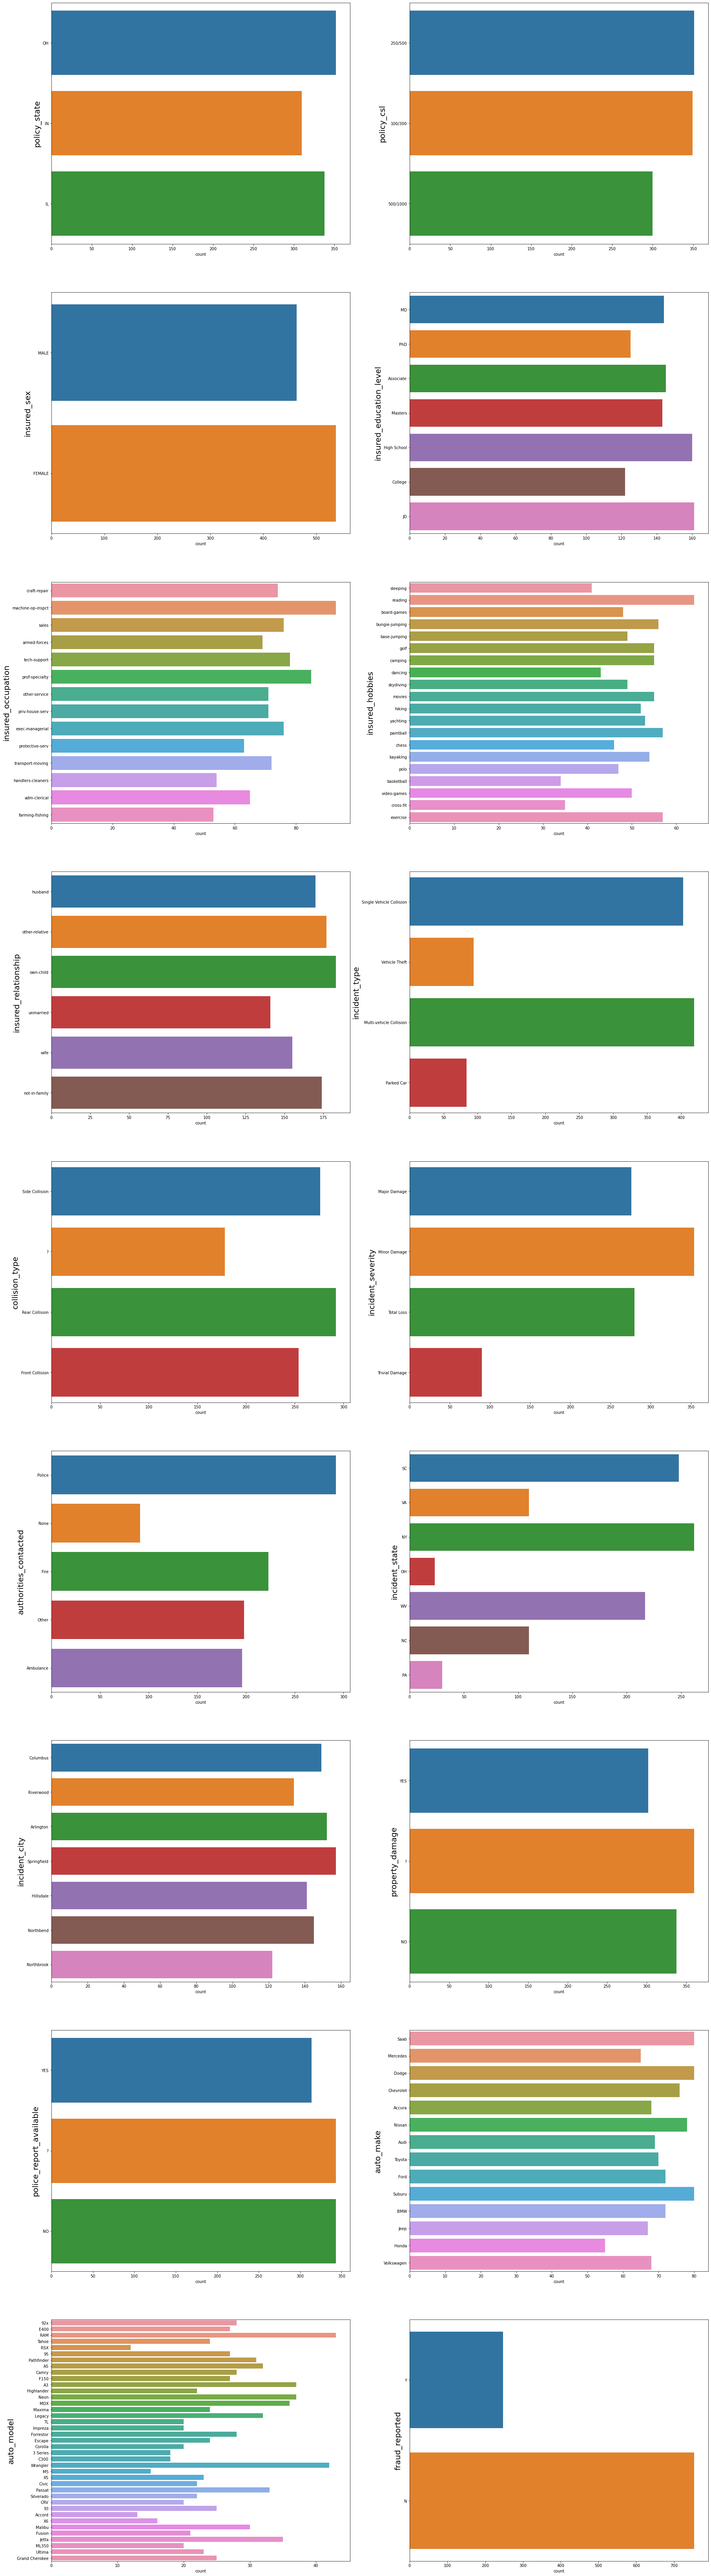

In [19]:
#Plotting count plots for categorical data

plt.figure(figsize=(30,120))
plotnumber = 1
for column in c_data:
    if plotnumber <=18:
        ax= plt.subplot(9,2,plotnumber)
        sns.countplot(data=c_data,y=c_data[column])
        plt.ylabel(column,fontsize=20)
        
    plotnumber+=1
plt.show

Interpreting the graphs

Data distribution looks good for most of the columns

There are some missing values ie..,'?' which need to be filled

The label/traget is imbalence which needs to be balanced



In [20]:
#checking for unique categoriesz
column_names = c_data.columns
for column_name in column_names:
    print("Column Name        :", column_name)
    print("------------------------------------------")
    print(data[column_name].value_counts(normalize=True, dropna=False)*100)
    print('\n')

Column Name        : policy_state
------------------------------------------
OH    35.2
IL    33.8
IN    31.0
Name: policy_state, dtype: float64


Column Name        : policy_csl
------------------------------------------
250/500     35.1
100/300     34.9
500/1000    30.0
Name: policy_csl, dtype: float64


Column Name        : insured_sex
------------------------------------------
FEMALE    53.7
MALE      46.3
Name: insured_sex, dtype: float64


Column Name        : insured_education_level
------------------------------------------
JD             16.1
High School    16.0
Associate      14.5
MD             14.4
Masters        14.3
PhD            12.5
College        12.2
Name: insured_education_level, dtype: float64


Column Name        : insured_occupation
------------------------------------------
machine-op-inspct    9.3
prof-specialty       8.5
tech-support         7.8
sales                7.6
exec-managerial      7.6
craft-repair         7.4
transport-moving     7.2
other-service   

In [21]:
#Let's deal with '?' in the dataset:
data = data.replace ("?", np.nan)

In [22]:
data.isna().sum()

months_as_customer               0
age                              0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim      

Now the ? are replaced with null values we will impute them using forward fill

In [23]:
data.fillna(method="ffill",inplace=True)

In [24]:
data.isna().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make 

In [25]:
#checking for unique categoriesz
column_names = c_data.columns
for column_name in column_names:
    print("Column Name        :", column_name)
    print("------------------------------------------")
    print(data[column_name].value_counts(normalize=True, dropna=False)*100)
    print('\n')

Column Name        : policy_state
------------------------------------------
OH    35.2
IL    33.8
IN    31.0
Name: policy_state, dtype: float64


Column Name        : policy_csl
------------------------------------------
250/500     35.1
100/300     34.9
500/1000    30.0
Name: policy_csl, dtype: float64


Column Name        : insured_sex
------------------------------------------
FEMALE    53.7
MALE      46.3
Name: insured_sex, dtype: float64


Column Name        : insured_education_level
------------------------------------------
JD             16.1
High School    16.0
Associate      14.5
MD             14.4
Masters        14.3
PhD            12.5
College        12.2
Name: insured_education_level, dtype: float64


Column Name        : insured_occupation
------------------------------------------
machine-op-inspct    9.3
prof-specialty       8.5
tech-support         7.8
sales                7.6
exec-managerial      7.6
craft-repair         7.4
transport-moving     7.2
other-service   

Now that we have looked at the categorical data and handled the missing values let's look at the numerical data

<function matplotlib.pyplot.show(close=None, block=None)>

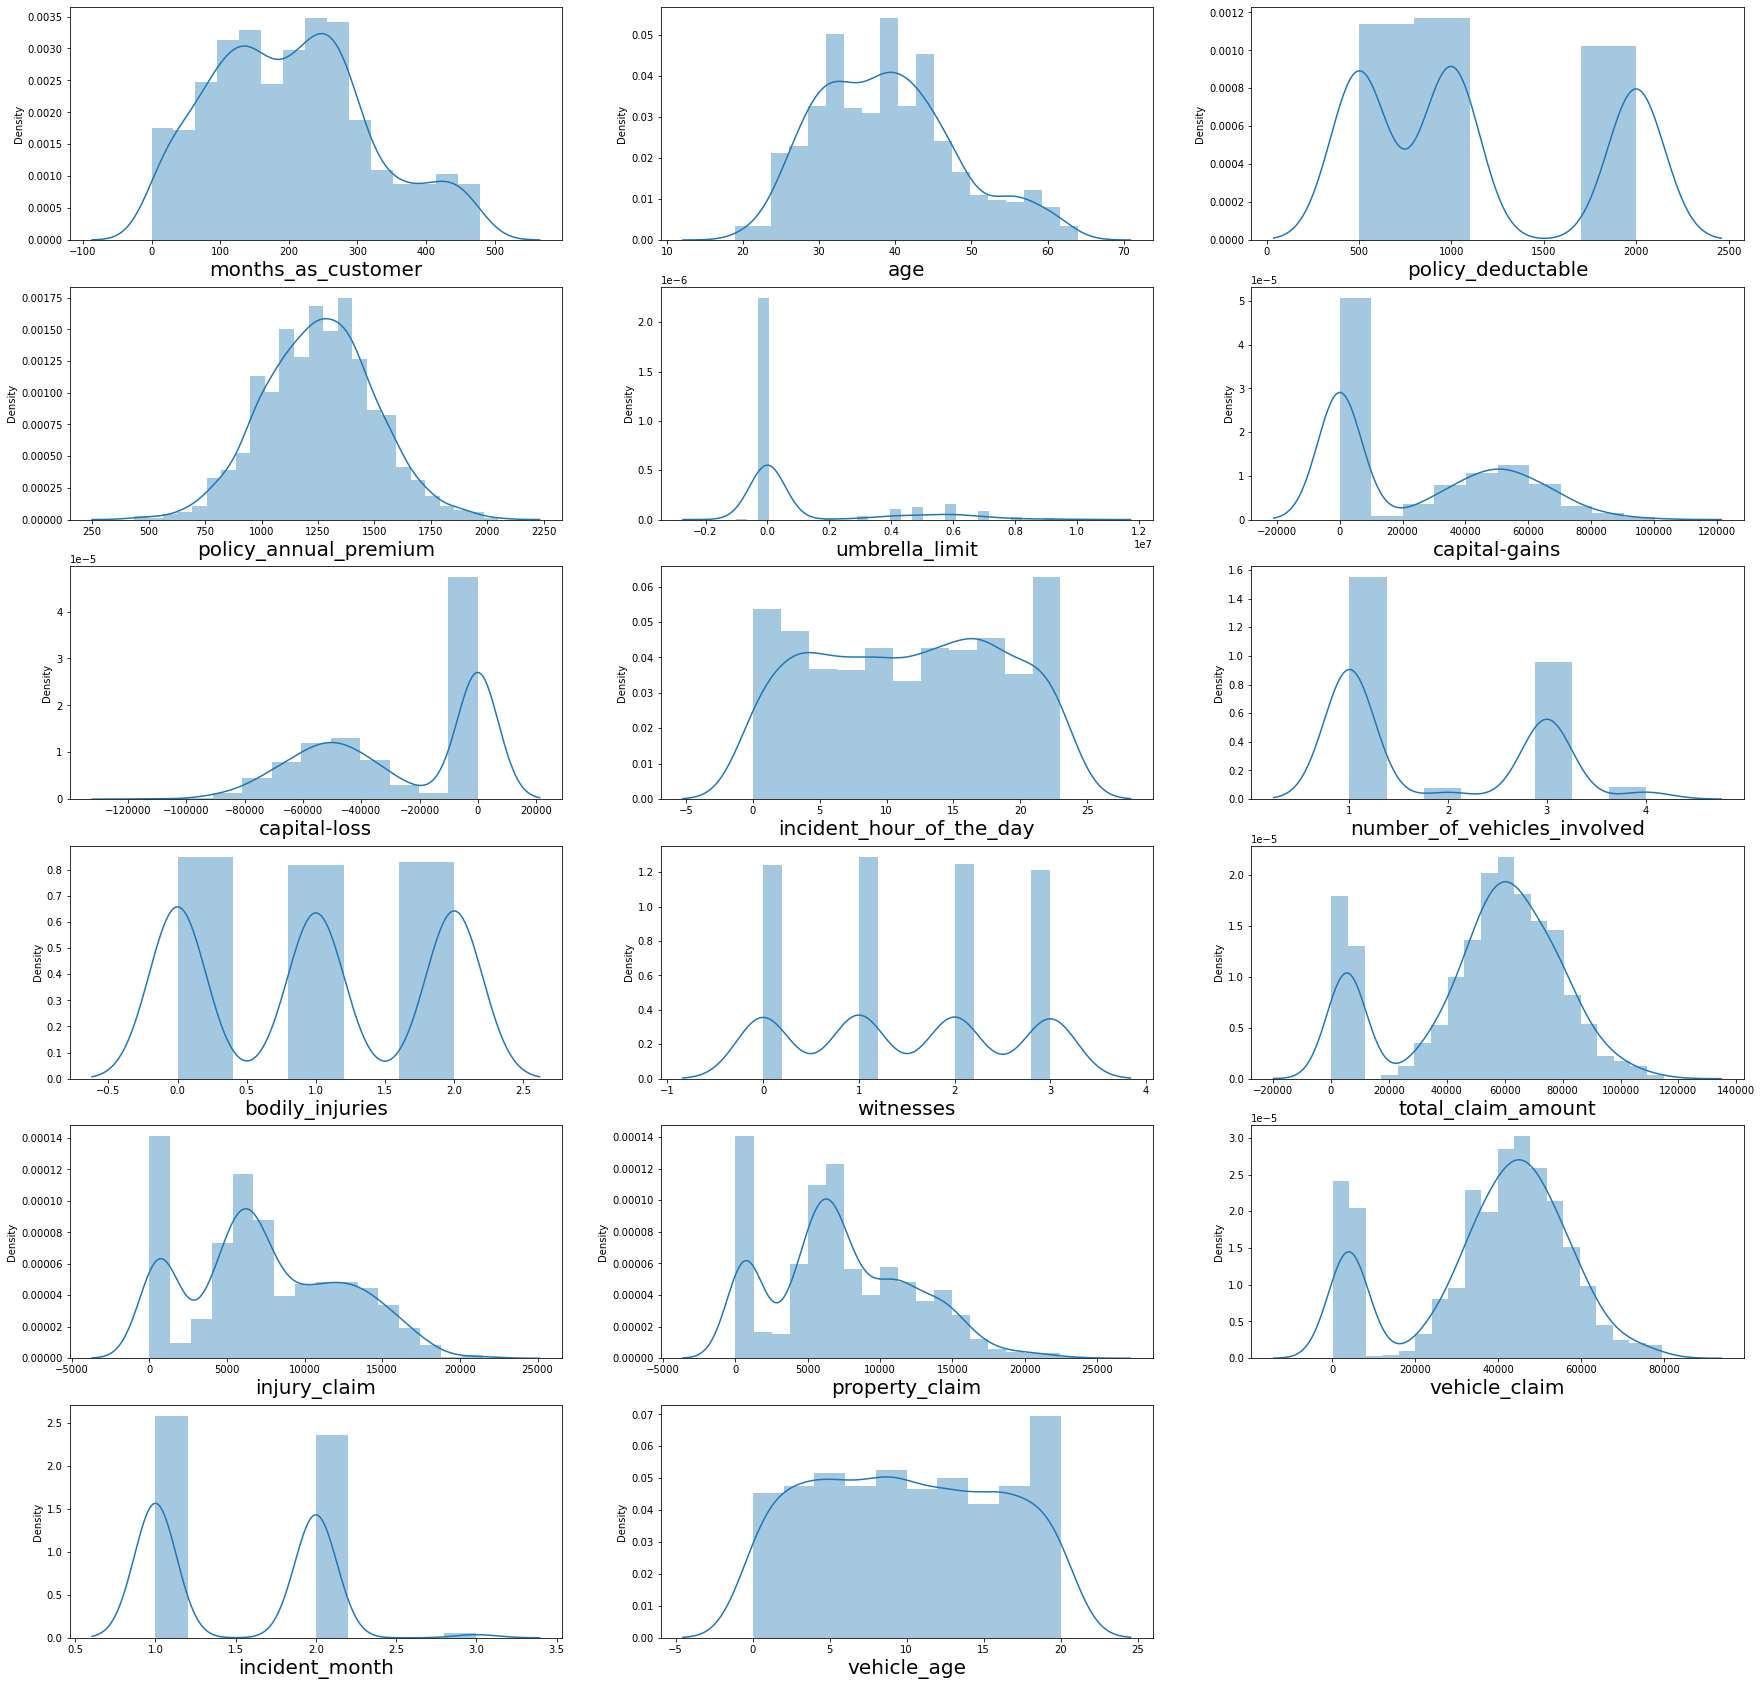

In [26]:
#Analysing numerical data
plt.figure(figsize=(30,30))
plotnumber = 1
for column in n_data:
    if plotnumber <=17:
        ax= plt.subplot(6,3,plotnumber)
        sns.distplot(n_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show

Numerical columns look good let's check for skewness in the data 

In [27]:
#Lets check for skewness
n_data.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
incident_month                 0.267378
vehicle_age                    0.048289
dtype: float64

Most of the columns have skewness below +/-0.5 except umbrella_limit vehicle_claim and total_claim amount

Let's check for outliers and see if deleting the outliers reduces the skewness

In [28]:
#Encoding careorical data:
L_encoder = LabelEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=L_encoder.fit_transform(data[i].values.reshape(-1,1))

In [29]:
data

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,incident_month,vehicle_age
0,328,48,2,1,1000,1406.91,0,1,4,2,...,1,71610,6510,13020,52080,10,1,1,1,11
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,1,5070,780,780,3510,8,12,1,1,8
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,0,34650,7700,3850,23100,4,30,0,2,8
3,256,41,0,1,2000,1415.74,6000000,0,6,1,...,0,63400,6340,6340,50720,3,34,1,1,1
4,228,44,0,2,1000,1583.91,6000000,1,0,11,...,0,6500,1300,650,4550,0,31,0,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,0,5,2,...,1,87200,17440,8720,61040,6,6,0,2,9
996,285,41,0,0,1000,1436.79,0,0,6,9,...,1,108480,18080,18080,72320,13,28,0,1,0
997,130,34,2,1,500,1383.49,3000000,0,5,1,...,1,67500,7500,7500,52500,11,19,0,1,19
998,458,62,0,2,2000,1356.92,5000000,1,0,5,...,1,46980,5220,5220,36540,1,5,0,2,17


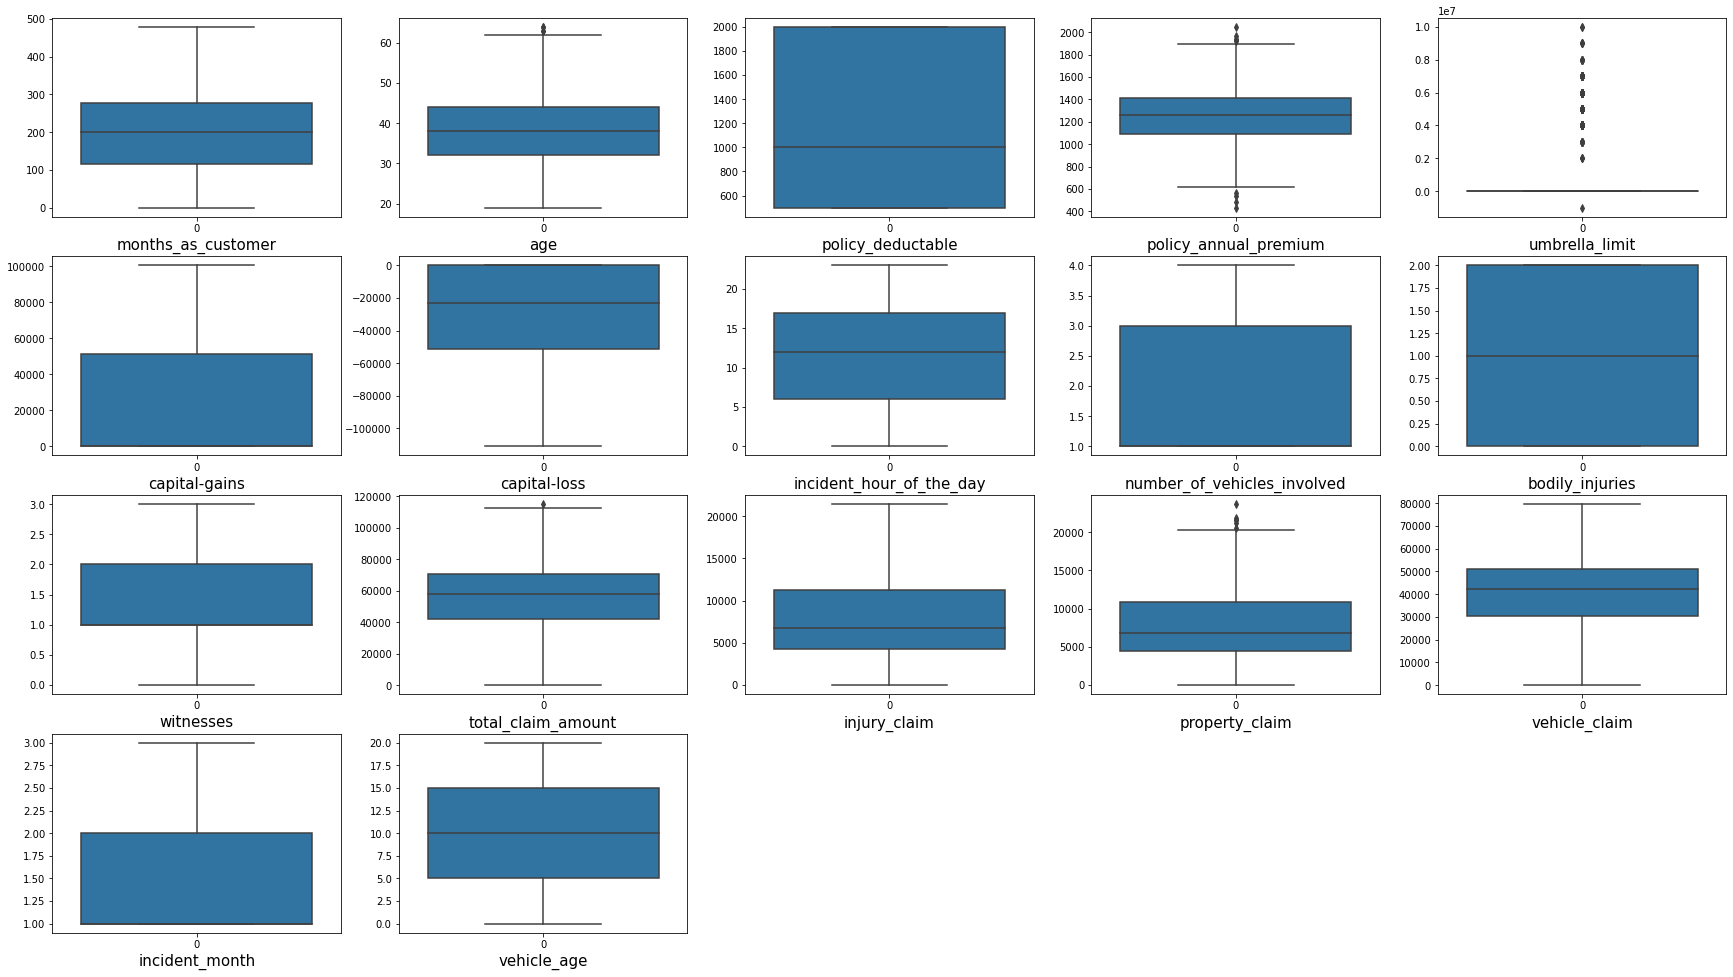

In [30]:
# Visualising outliers using box plot
# Checking for outliers using boxplot
plt.figure(figsize=(30,30))
graph =1
for column in n_data:
    if graph <=35:
        plt.subplot(7,5,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

From the above graphs we observe the presence of outliers in total_claim and umberalla_limit

 Let's find the outliers using z-score

In [31]:
features=n_data
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(features))
threshold=3
outliers=np.where(z>3)
outliers

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 807, 875, 922, 975], dtype=int64),
 array([ 4,  4,  4,  4,  4,  3,  3,  4,  4,  4,  4, 13,  4,  4,  4,  3,  6,
         4,  4,  4], dtype=int64))

In [32]:
new_data=data.drop(outliers[0],axis=0)
new_data

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,incident_month,vehicle_age
0,328,48,2,1,1000,1406.91,0,1,4,2,...,1,71610,6510,13020,52080,10,1,1,1,11
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,1,5070,780,780,3510,8,12,1,1,8
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,0,34650,7700,3850,23100,4,30,0,2,8
3,256,41,0,1,2000,1415.74,6000000,0,6,1,...,0,63400,6340,6340,50720,3,34,1,1,1
4,228,44,0,2,1000,1583.91,6000000,1,0,11,...,0,6500,1300,650,4550,0,31,0,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,0,5,2,...,1,87200,17440,8720,61040,6,6,0,2,9
996,285,41,0,0,1000,1436.79,0,0,6,9,...,1,108480,18080,18080,72320,13,28,0,1,0
997,130,34,2,1,500,1383.49,3000000,0,5,1,...,1,67500,7500,7500,52500,11,19,0,1,19
998,458,62,0,2,2000,1356.92,5000000,1,0,5,...,1,46980,5220,5220,36540,1,5,0,2,17


In [33]:
data_loss=((1000-980)/1000)*100
data_loss

2.0

In [34]:
new_data.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.049390
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage                0.085925
bodily_injuries                0.003757
witnesses                      0.026211


Deleting the outliers will give a data loss of 2%

Since the dataset is not very large and deleting the outliers has not reduced the skewness in data

Proceeding without deleting the outliers 

Will use Power Transformer to deal with the outliers and skewness

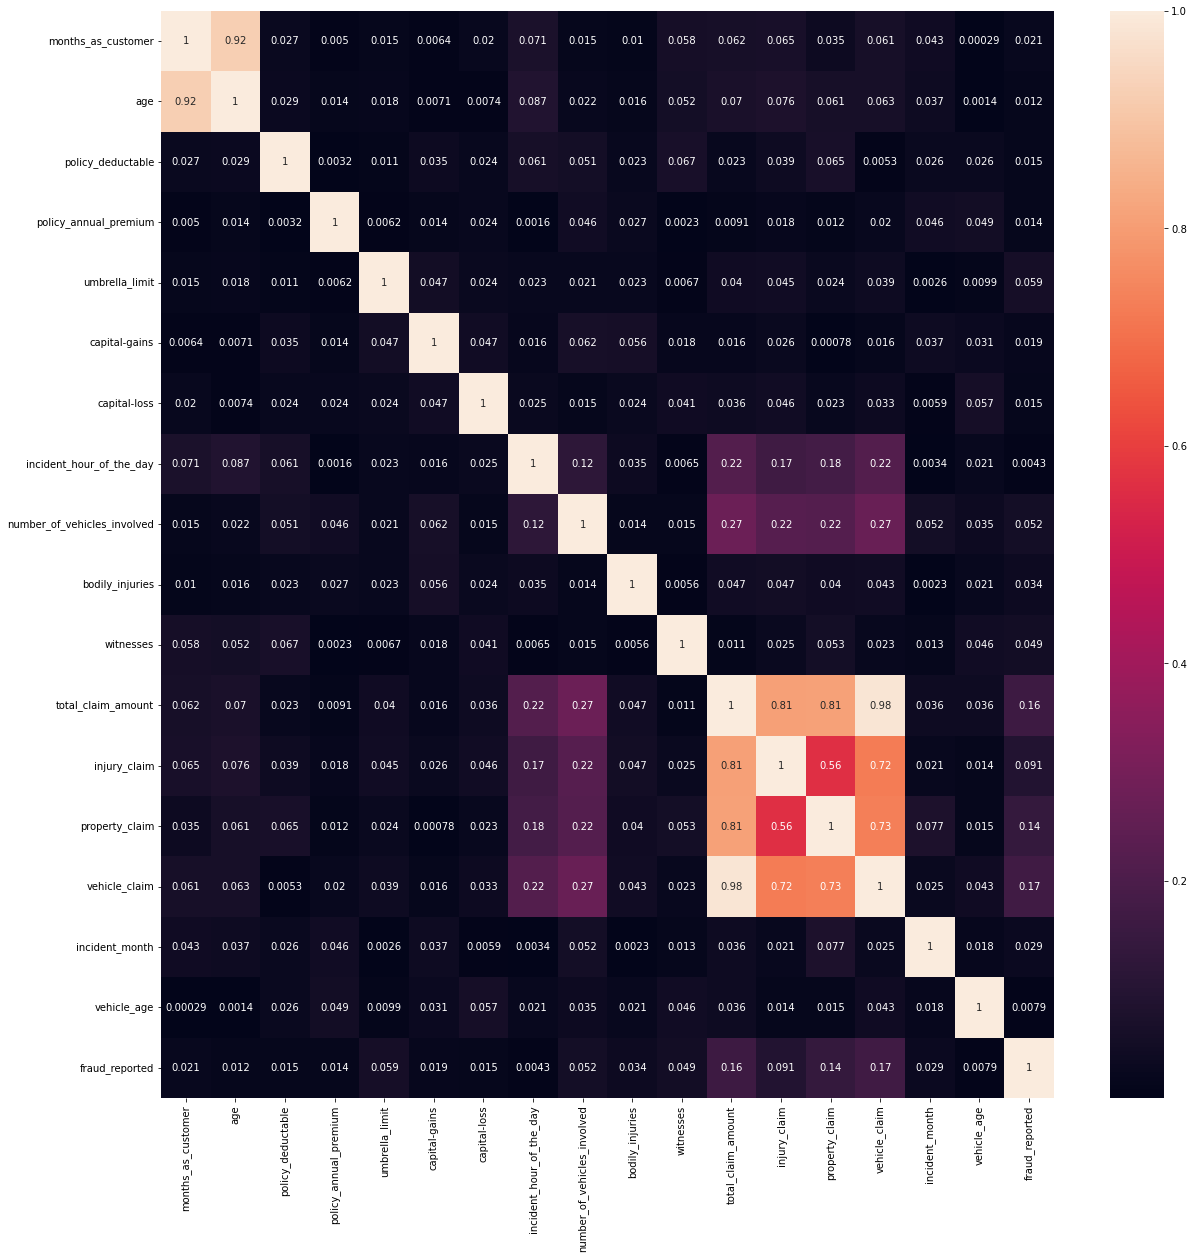

In [35]:
## Plotting heat map to check for multicollinerity and labelv//s feature relationship
n_data['fraud_reported']=data['fraud_reported']
df_corr = (n_data.corr().abs())
plt.figure(figsize=(20,20))
sns.heatmap(df_corr, annot= True, annot_kws ={'size':10})
plt.show()

Feature and label relationship also looks good

Injury_claim, property_claim and vehicle claim have a strong relationship with total_claim_amount
this could be as total_claim is the sum of the others

Howerver we will calculate vifs to rule out any multicollinearity

 Using Power Transformer to deal with above issues of outliers and skewness and then calculating vifs to check for  multicollinearity  

In [36]:
#Dividing data into features and label

X = data.drop(columns=['fraud_reported'])
Y= data['fraud_reported']

In [37]:
pt = PowerTransformer()

X_scaled = pd.DataFrame(pt.fit_transform(X), columns=X.columns)
X_scaled

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,incident_month,vehicle_age
0,1.051279,1.008733,1.146048,0.178846,0.067784,0.616676,-0.349113,1.076953,0.568665,-1.154771,...,0.517616,1.051315,0.715714,0.005762,1.081793,0.753697,0.859111,-1.808345,-0.962483,0.265553
1,0.304536,0.431433,0.071806,0.178846,1.271863,-0.242577,1.357817,1.076953,0.568665,-0.089755,...,-1.410682,1.051315,-1.776979,-1.525347,-1.557391,-1.786629,0.418616,-0.586225,-0.962483,-0.215161
2,-0.511226,-1.139513,1.146048,-1.237596,1.271863,0.642206,1.357817,-0.928546,1.462749,1.055047,...,1.290743,-0.951190,-0.716825,0.223833,-0.577507,-0.820881,-0.555149,0.944905,1.000618,-0.215161
3,0.523344,0.327852,-1.259374,0.178846,1.271863,0.652860,1.644005,-0.928546,1.462749,-1.464730,...,0.517616,-0.951190,0.391426,-0.026762,-0.034793,0.677602,-0.828189,1.252785,-0.962483,-1.614585
4,0.304536,0.631918,-1.259374,1.230487,0.067784,1.342030,1.644005,1.076953,-1.631894,1.055047,...,-0.355794,-0.951190,-1.729802,-1.304154,-1.622102,-1.740038,-1.809810,1.022679,1.000618,-0.562463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.287530,0.002457,1.146048,1.230487,0.067784,0.222833,-0.349113,-0.928546,1.025429,-1.154771,...,-0.355794,1.051315,1.338829,1.638435,0.403281,1.259186,-0.049272,-1.194088,1.000618,-0.050280
996,0.741446,0.327852,-1.259374,-1.237596,0.067784,0.739122,-0.349113,-0.928546,1.462749,0.613468,...,1.290743,1.051315,2.202447,1.717091,1.767003,1.904757,1.481528,0.787622,-0.962483,-1.901799
997,-0.549706,-0.470444,1.146048,0.178846,-1.211269,0.520703,0.756509,-0.928546,1.025429,-1.464730,...,1.290743,1.051315,0.553012,0.188267,0.186095,0.777232,1.071136,0.045463,-0.962483,1.399980
998,1.912654,2.130554,-1.259374,1.230487,1.271863,0.411823,1.357817,1.076953,-1.631894,-0.338647,...,-0.355794,1.051315,-0.247520,-0.251353,-0.265012,-0.104258,-1.440763,-1.305341,1.000618,1.131528


In [38]:
X_scaled.skew()

months_as_customer            -0.135661
age                           -0.001945
policy_state                  -0.145377
policy_csl                    -0.100769
policy_deductable              0.023988
policy_annual_premium          0.004758
umbrella_limit                -7.865930
insured_sex                    0.148630
insured_education_level       -0.188564
insured_occupation            -0.239336
insured_hobbies               -0.247798
insured_relationship          -0.160421
capital-gains                  0.038722
capital-loss                   0.090488
incident_type                 -0.088766
collision_type                -0.154425
incident_severity             -0.079282
authorities_contacted         -0.227269
incident_state                -0.255777
incident_city                 -0.181772
incident_hour_of_the_day      -0.256957
number_of_vehicles_involved    0.363693
property_damage                0.084201
bodily_injuries               -0.128799
witnesses                     -0.153648


Since Power Transformer is increasing the skewness of umberalla_limit will only use Standard Scaler to scale the dataset 

In [39]:
sc = StandardScaler()

X_scaled1 = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X_scaled1

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,incident_month,vehicle_age
0,1.078140,0.990836,1.187173,0.060937,-0.222383,0.616705,-0.479476,1.076953,0.530931,-1.158316,...,0.461838,1.051315,0.714257,-0.189283,1.165505,0.749653,0.856466,-1.645743,-0.947587,0.183440
1,0.208995,0.334073,-0.016856,0.060937,1.412784,-0.242521,1.697980,1.076953,0.530931,-0.162558,...,-1.338700,1.051315,-1.807312,-1.363822,-1.372696,-1.823346,0.360539,-0.657470,-0.947587,-0.315491
2,-0.608002,-1.088913,1.187173,-1.182668,1.412784,0.642233,1.697980,-0.928546,1.557877,1.082141,...,1.362107,-0.951190,-0.686362,0.054644,-0.736072,-0.785565,-0.631315,0.959702,0.962871,-0.315491
3,0.452355,0.224613,-1.220886,0.060937,1.412784,0.652886,2.133471,-0.928546,1.557877,-1.407256,...,0.461838,-0.951190,0.403135,-0.224130,-0.219722,0.677607,-0.879279,1.319074,-0.947587,-1.479664
4,0.208995,0.552994,-1.220886,1.304542,-0.222383,1.341980,2.133471,1.076953,-1.522961,1.082141,...,-0.438431,-0.951190,-1.753121,-1.257232,-1.399654,-1.768252,-1.623169,1.049545,0.962871,-0.648112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,1.187173,1.304542,-0.222383,0.222884,-0.479476,-0.928546,1.044404,-1.158316,...,-0.438431,1.051315,1.305049,2.051155,0.273817,1.224309,-0.135388,-1.196528,0.962871,-0.149180
996,0.704407,0.224613,-1.220886,-1.182668,-0.222383,0.739141,-0.479476,-0.928546,1.557877,0.584261,...,1.362107,1.051315,2.111466,2.182342,2.214794,1.821868,1.600357,0.780016,-0.947587,-1.645974
997,-0.642767,-0.541611,1.187173,0.060937,-1.039966,0.520739,0.826998,-0.928546,1.044404,-1.407256,...,1.362107,1.051315,0.558507,0.013648,0.020826,0.771902,1.104430,-0.028570,-0.947587,1.513924
998,2.208028,2.523284,-1.220886,1.304542,1.412784,0.411866,1.697980,1.076953,-1.522961,-0.411497,...,-0.438431,1.051315,-0.219110,-0.453708,-0.451976,-0.073580,-1.375206,-1.286371,0.962871,1.181303


In [40]:
#checking for skewness
X_scaled1.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.050207
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.084201
bodily_injuries                0.014777
witnesses                      0.019636


Now the data is scaled lets ckeck for multicollinearity

In [41]:
#Using VIF to check for muliticolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled1,i) for i in range(X_scaled1.shape[1])]
vif['feature']= X_scaled1.columns
vif

,vif,feature
0,6.840294,months_as_customer
1,6.842639,age
2,1.035245,policy_state
3,1.028066,policy_csl
4,1.035451,policy_deductable
5,1.029512,policy_annual_premium
6,1.025467,umbrella_limit
7,1.027459,insured_sex
8,1.038877,insured_education_level
9,1.014855,insured_occupation


vifs for total_claim, injury_claim, proeprty_claim and vehicle_claim is infinity
Deleting injury_claim,property_claim and vehicle_claim and check for vif 

In [42]:
X_scaled1=X_scaled1.drop(columns=['injury_claim','property_claim','vehicle_claim'])

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled1,i) for i in range(X_scaled1.shape[1])]
vif['feature']= X_scaled1.columns
vif

,vif,feature
0,6.775039,months_as_customer
1,6.783637,age
2,1.030941,policy_state
3,1.024688,policy_csl
4,1.025626,policy_deductable
5,1.025044,policy_annual_premium
6,1.024915,umbrella_limit
7,1.025904,insured_sex
8,1.037471,insured_education_level
9,1.013553,insured_occupation


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

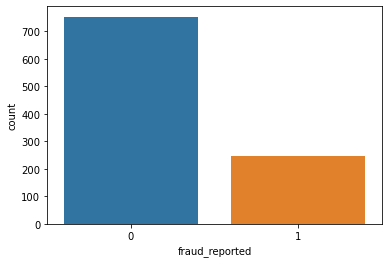

In [44]:
sns.countplot(Y)

Our target or label is not balanced

In [45]:
# Balancing the target column "income" using SMOTE on training data
from imblearn.over_sampling import SMOTE

In [46]:
#traintestsplit
x_train,x_test,y_train,y_test = train_test_split (X_scaled,Y, test_size=0.30, random_state = 285)

In [47]:
x_train_rs,y_train_rs= SMOTE().fit_resample(x_train,y_train)

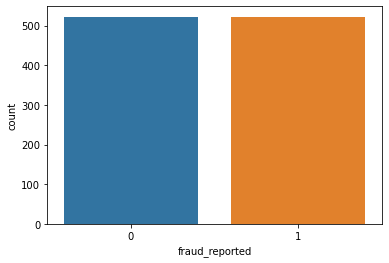

In [48]:
sns.countplot(y_train_rs)
plt.show()

the target column of training data is balanced

In [49]:
#traintestsplit
lg = LogisticRegression()
for i in range(100,500):
    x_train_rs,x_test,y_train_rs,y_test = train_test_split (X_scaled,Y, test_size=0.3, random_state = i)
    lg.fit(x_train,y_train)
    pred_train = lg.predict(x_train)
    pred_test = lg.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print ("At random state ",i,"the model performs well")
        print ("Acuraccy of training model :",accuracy_score(y_train,pred_train)*100)
        print ("Accuracy of testing model :",accuracy_score(y_test,pred_test)*100)
        print ("\n-----------------------------------------\n")

At random state  115 the model performs well
Acuraccy of training model : 79.14285714285715
Accuracy of testing model : 79.0

-----------------------------------------

At random state  117 the model performs well
Acuraccy of training model : 79.14285714285715
Accuracy of testing model : 78.66666666666666

-----------------------------------------

At random state  118 the model performs well
Acuraccy of training model : 79.14285714285715
Accuracy of testing model : 79.33333333333333

-----------------------------------------

At random state  127 the model performs well
Acuraccy of training model : 79.14285714285715
Accuracy of testing model : 79.0

-----------------------------------------

At random state  140 the model performs well
Acuraccy of training model : 79.14285714285715
Accuracy of testing model : 79.33333333333333

-----------------------------------------

At random state  146 the model performs well
Acuraccy of training model : 79.14285714285715
Accuracy of testing mode

Acuraccy of training model : 79.14285714285715
Accuracy of testing model : 79.0

-----------------------------------------

At random state  316 the model performs well
Acuraccy of training model : 79.14285714285715
Accuracy of testing model : 79.0

-----------------------------------------

At random state  318 the model performs well
Acuraccy of training model : 79.14285714285715
Accuracy of testing model : 78.66666666666666

-----------------------------------------

At random state  326 the model performs well
Acuraccy of training model : 79.14285714285715
Accuracy of testing model : 79.0

-----------------------------------------

At random state  333 the model performs well
Acuraccy of training model : 79.14285714285715
Accuracy of testing model : 79.0

-----------------------------------------

At random state  336 the model performs well
Acuraccy of training model : 79.14285714285715
Accuracy of testing model : 79.33333333333333

-----------------------------------------

At ra

Selecting 214 as random state

In [50]:
#traintestsplit
x_train_rs,x_test,y_train_rs,y_test = train_test_split (X_scaled,Y, test_size=0.30, random_state = 214)

In [51]:
# Model Selection
def model_selection (algorithm, x_train_rs,y_train_rs,x_test,y_test):
    algorithm.fit(x_train_rs,y_train_rs)
    pred_train = algorithm.predict(x_train_rs)
    pred_test = algorithm.predict(x_test)
    auc_score = roc_auc_score(y_test,pred_test)
    
    print (algorithm)
    print ("Acuraccy of training model :",accuracy_score(y_train_rs,pred_train))
    print ("Accuracy of testing model :",accuracy_score(y_test,pred_test))
    print ("Classification report of training data :\n",classification_report(y_train_rs,pred_train))
    print ("Classification report of test data :\n ",classification_report(y_test,pred_test))
    print ("Confusion Matrix \n",confusion_matrix(y_test,pred_test))
    
    # Calculate ROC curve
    fpr, tpr, algorithm = roc_curve(y_test, pred_test)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    print ("\nAUC score: ",auc_score)
    print ("\n -------------------------------------------------------------\n")

LogisticRegression()
Acuraccy of training model : 0.8
Accuracy of testing model : 0.77
Classification report of training data :
               precision    recall  f1-score   support

           0       0.83      0.92      0.87       529
           1       0.63      0.43      0.51       171

    accuracy                           0.80       700
   macro avg       0.73      0.68      0.69       700
weighted avg       0.78      0.80      0.79       700

Classification report of test data :
                precision    recall  f1-score   support

           0       0.82      0.88      0.85       224
           1       0.56      0.45      0.50        76

    accuracy                           0.77       300
   macro avg       0.69      0.66      0.67       300
weighted avg       0.76      0.77      0.76       300

Confusion Matrix 
 [[197  27]
 [ 42  34]]


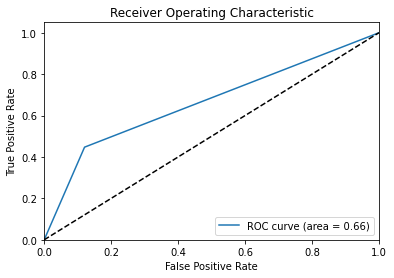


AUC score:  0.6634163533834586

 -------------------------------------------------------------

KNeighborsClassifier()
Acuraccy of training model : 0.8
Accuracy of testing model : 0.72
Classification report of training data :
               precision    recall  f1-score   support

           0       0.81      0.96      0.88       529
           1       0.72      0.30      0.42       171

    accuracy                           0.80       700
   macro avg       0.76      0.63      0.65       700
weighted avg       0.79      0.80      0.77       700

Classification report of test data :
                precision    recall  f1-score   support

           0       0.76      0.91      0.83       224
           1       0.38      0.17      0.24        76

    accuracy                           0.72       300
   macro avg       0.57      0.54      0.53       300
weighted avg       0.67      0.72      0.68       300

Confusion Matrix 
 [[203  21]
 [ 63  13]]


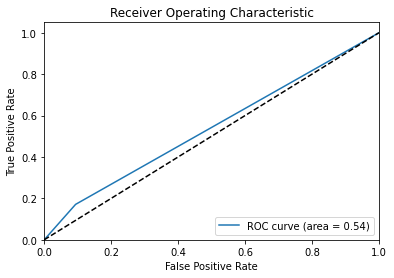


AUC score:  0.5386513157894737

 -------------------------------------------------------------

DecisionTreeClassifier()
Acuraccy of training model : 1.0
Accuracy of testing model : 0.77
Classification report of training data :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       529
           1       1.00      1.00      1.00       171

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

Classification report of test data :
                precision    recall  f1-score   support

           0       0.87      0.81      0.84       224
           1       0.54      0.66      0.59        76

    accuracy                           0.77       300
   macro avg       0.71      0.73      0.72       300
weighted avg       0.79      0.77      0.78       300

Confusion Matrix 
 [[181  43]
 [ 26  50]]


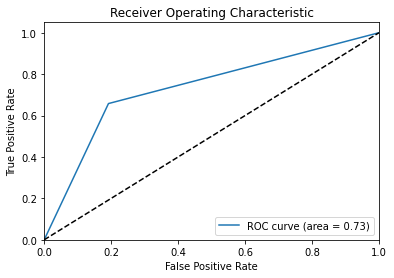


AUC score:  0.7329652255639099

 -------------------------------------------------------------

SVC()
Acuraccy of training model : 0.8914285714285715
Accuracy of testing model : 0.7366666666666667
Classification report of training data :
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       529
           1       1.00      0.56      0.71       171

    accuracy                           0.89       700
   macro avg       0.94      0.78      0.82       700
weighted avg       0.91      0.89      0.88       700

Classification report of test data :
                precision    recall  f1-score   support

           0       0.75      0.96      0.85       224
           1       0.38      0.07      0.11        76

    accuracy                           0.74       300
   macro avg       0.57      0.52      0.48       300
weighted avg       0.66      0.74      0.66       300

Confusion Matrix 
 [[216   8]
 [ 71   5]]


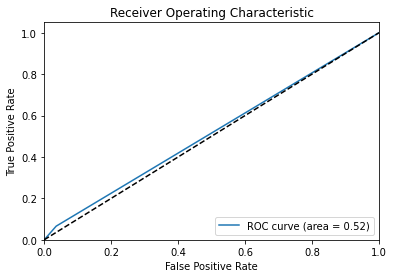


AUC score:  0.5150375939849625

 -------------------------------------------------------------

AdaBoostClassifier()
Acuraccy of training model : 0.8885714285714286
Accuracy of testing model : 0.7533333333333333
Classification report of training data :
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       529
           1       0.82      0.70      0.75       171

    accuracy                           0.89       700
   macro avg       0.86      0.82      0.84       700
weighted avg       0.89      0.89      0.89       700

Classification report of test data :
                precision    recall  f1-score   support

           0       0.81      0.87      0.84       224
           1       0.52      0.41      0.46        76

    accuracy                           0.75       300
   macro avg       0.66      0.64      0.65       300
weighted avg       0.74      0.75      0.74       300

Confusion Matrix 
 [[195  29]
 [ 45  31]]


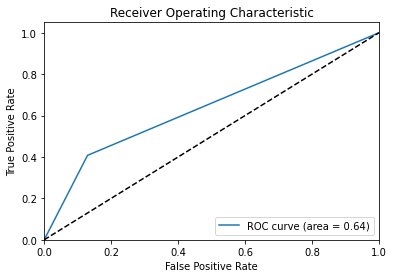


AUC score:  0.6392152255639099

 -------------------------------------------------------------

RandomForestClassifier()
Acuraccy of training model : 1.0
Accuracy of testing model : 0.7433333333333333
Classification report of training data :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       529
           1       1.00      1.00      1.00       171

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

Classification report of test data :
                precision    recall  f1-score   support

           0       0.78      0.92      0.84       224
           1       0.48      0.21      0.29        76

    accuracy                           0.74       300
   macro avg       0.63      0.57      0.57       300
weighted avg       0.70      0.74      0.70       300

Confusion Matrix 
 [[207  17]
 [ 60  16]]


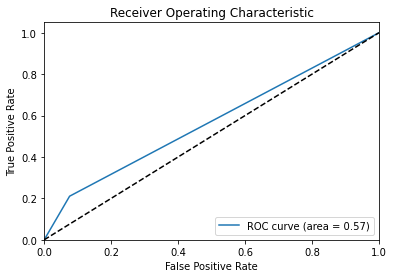


AUC score:  0.5673167293233082

 -------------------------------------------------------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Acuraccy of training model : 1.0
Accuracy of testing model : 0.8
Classification report of training data :
               precision    recall  f1-score 

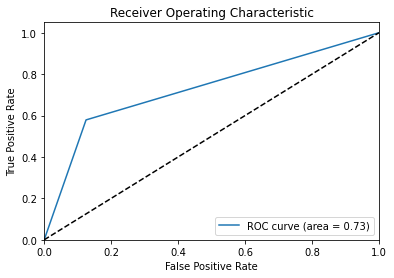


AUC score:  0.7269736842105263

 -------------------------------------------------------------



In [52]:
#Logistic Regression
lr= LogisticRegression()
model_selection(lr,x_train_rs,y_train_rs,x_test,y_test)

#Knn
knn= KNeighborsClassifier()
model_selection(knn,x_train_rs,y_train_rs,x_test,y_test)

#DecisionTree
dt= DecisionTreeClassifier()
model_selection(dt,x_train_rs,y_train_rs,x_test,y_test)

#SVC
svc= SVC()
model_selection(svc,x_train_rs,y_train_rs,x_test,y_test)

#AdaBoost
ada = AdaBoostClassifier()
model_selection(ada,x_train_rs,y_train_rs,x_test,y_test)

#Random Forest 
rfc= RandomForestClassifier()
model_selection(rfc,x_train_rs,y_train_rs,x_test,y_test)

#XGBoost
xg = xgb.XGBClassifier()
model_selection(xg,x_train_rs,y_train_rs,x_test,y_test)


Selecting DecisionTree and XGBoost for hyperparameter tunning as it has the highest accuracy for testing data and has less False Positives and False Negitives when compared to other models 

In [53]:
# Hyperparameter Tuning :

# DecisionTree
params = {'criterion':['gini','entropy'],
    'max_depth': range(8,12),
    'min_samples_leaf': range(2,5),
    'min_samples_split':range(3,6)
    }

clf = GridSearchCV(dt,params)
clf.fit(x_train_rs,y_train_rs)
print ("Decision Tree: \n",clf.best_params_)

#XGBoost
params = {
    'learning_rate': [0.1,0.2,0.],
    'max_depth': [5,8,10],
    'gamma': [0, 0.5, 1]
}

clf = GridSearchCV(xg,params)
clf.fit(x_train_rs,y_train_rs)
print ("XGBoost: \n",clf.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 4}
XGBoost: 
 {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10}


DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=4)
Acuraccy of training model : 0.92
Accuracy of testing model : 0.86
Classification report of training data :
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       522
           1       0.90      0.78      0.83       178

    accuracy                           0.92       700
   macro avg       0.91      0.87      0.89       700
weighted avg       0.92      0.92      0.92       700

Classification report of test data :
                precision    recall  f1-score   support

           0       0.89      0.93      0.91       224
           1       0.76      0.66      0.70        76

    accuracy                           0.86       300
   macro avg       0.82      0.79      0.81       300
weighted avg       0.86      0.86      0.86       300

Confusion Matrix 
 [[208  16]
 [ 26  50]]


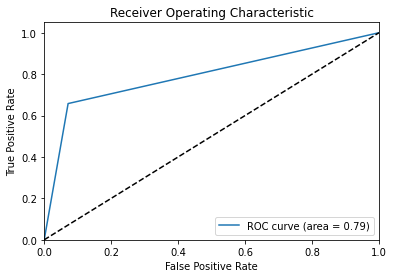


AUC score:  0.793233082706767

 -------------------------------------------------------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Acuraccy of training model : 1.0
Accuracy of testing model : 0.8
Classification report of training data :
               precision    recall  f1-score   suppo

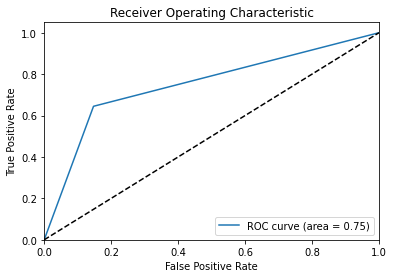


AUC score:  0.7487077067669173

 -------------------------------------------------------------



In [54]:
#Tunned Models:

dt1 = DecisionTreeClassifier(criterion= 'gini', max_depth = 8, min_samples_leaf = 4, min_samples_split = 4)
model_selection(dt1,x_train_rs,y_train_rs,x_test,y_test)

xg1 = xgb.XGBClassifier(gamma=0, learning_rate=0.1, max_depth=10)
model_selection(xg1,x_train_rs,y_train_rs,x_test,y_test)

After tunnining the parameters it is observed that the Accuracy and AUC have increased considerably

Selecting DecisionTree for prediction as it has 
1. The best accuracy 
2. Less number of False Postives and False Negitves
3. Most AUC

In [55]:
# Saving Model
import pickle
filename= 'Ins_Fraud_Det.pkl'
pickle.dump(dt1,open(filename, 'wb'))

In [56]:
#Prediction
a= np.array(y_test)
predicted=np.array (dt1.predict(x_test))
df = pd.DataFrame({"Orignal":a, "Predicted":predicted}, index = range(len(a)))
df

,Orignal,Predicted
0,0,1
1,0,0
2,1,1
3,0,0
4,0,1
...,...,...
295,0,0
296,0,0
297,0,0
298,0,0


In [57]:
#Final Prediction
a= L_encoder.inverse_transform(np.array(y_test))
predicted=L_encoder.inverse_transform(np.array (dt1.predict(x_test)))
df1 = pd.DataFrame({"Orignal":a, "Predicted":predicted}, index = range(len(a)))
df1

,Orignal,Predicted
0,N,Y
1,N,N
2,Y,Y
3,N,N
4,N,Y
...,...,...
295,N,N
296,N,N
297,N,N
298,N,N
